In [6]:
import numpy as np
import matplotlib
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784')

C:\Users\User\AppData\Local\Temp\ipykernel_8804\2642756118.py:3: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift
d:\cours\pds\jupvenv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [10]:
import numpy as np
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):
    img = img.reshape((28, 28))
    h, w = 28 , 28

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [11]:
def rotate_image(image,ang):
  image = image.reshape((28, 28))
  from scipy.ndimage.interpolation import rotate
  rotated = rotate(image, angle=ang,reshape=False)

  #shifted_image = np.rot90(image)
  return rotated.reshape([-1])

In [12]:
from scipy.ndimage.filters import gaussian_filter
def blurg(image,sigm):
  blurred = gaussian_filter(image, sigma=sigm)
  return blurred


C:\Users\User\AppData\Local\Temp\ipykernel_8804\2159934768.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [13]:
X, y = mnist ["data"] , mnist ["target"]

X=np.array(X);
y=np.array(y);
image = X[34055]
print(len(y))

70000


In [14]:
X_train , X_test , y_train , y_test = X[:60000] ,X[60000:] ,y[:60000] ,y[60000:]
print(len(X_train))
X_train=np.array(X_train)
y_train=np.array(y_train)
shuffle_idx =np.random.permutation(len (X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

60000


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("score  knn Avant entrainement", accuracy_score(y_test, y_predict))
lknn=[]
count=0
for i in range(len(y_predict)):
  if y_predict[i]==y_test[i]:
    count+=1
  else:
    lknn.append(i)
print(count)
print('lknn',lknn)
print("score knn avant entrainement: ",count/len(y_predict))

score  knn Avant entrainement 0.9691
9691
lknn [115, 195, 241, 268, 300, 320, 321, 341, 358, 381, 412, 444, 445, 447, 464, 479, 495, 551, 578, 582, 583, 593, 646, 684, 689, 717, 726, 740, 839, 844, 881, 924, 938, 939, 947, 951, 956, 957, 1014, 1039, 1068, 1082, 1089, 1107, 1112, 1114, 1192, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1325, 1364, 1422, 1425, 1465, 1500, 1522, 1527, 1530, 1559, 1626, 1681, 1695, 1709, 1721, 1737, 1754, 1774, 1782, 1790, 1865, 1878, 1901, 1955, 1970, 1984, 2044, 2052, 2058, 2063, 2093, 2098, 2105, 2109, 2118, 2130, 2135, 2168, 2177, 2182, 2224, 2233, 2237, 2272, 2280, 2288, 2293, 2299, 2308, 2314, 2339, 2351, 2387, 2400, 2422, 2430, 2437, 2454, 2457, 2488, 2533, 2582, 2607, 2648, 2654, 2721, 2758, 2810, 2828, 2896, 2927, 2939, 2952, 2953, 3005, 3060, 3062, 3073, 3115, 3117, 3136, 3160, 3176, 3206, 3228, 3229, 3240, 3269, 3323, 3333, 3337, 3369, 3388, 3405, 3422, 3456, 3474, 3475, 3503, 3520, 3558, 3559, 3567, 3597, 3599, 3654, 3662, 3702, 3727, 3742, 3751, 

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
test_predictions =y_predict



cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
preds=rf.fit(X_train, y_train)
preds=rf.predict(X_test)
print(preds)
print(y_test)
print(len(preds))
count=0
l=[]
for i in range(len(preds)):
  if preds[i]==y_test[i]:
    count+=1
  else:
    l.append(i)
print(count)
print('l',l)
print("score Random Forest avant entrainement: ",count/len(preds))

['7' '2' '1' ... '4' '5' '6']
['7' '2' '1' ... '4' '5' '6']
10000
9699
l [124, 142, 241, 247, 259, 268, 290, 320, 321, 340, 381, 403, 445, 448, 449, 479, 495, 578, 582, 628, 646, 659, 684, 691, 707, 717, 720, 740, 839, 844, 900, 924, 938, 947, 950, 951, 956, 965, 1003, 1014, 1062, 1068, 1107, 1112, 1114, 1181, 1192, 1206, 1226, 1232, 1247, 1248, 1260, 1270, 1283, 1299, 1319, 1326, 1337, 1364, 1393, 1425, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1621, 1626, 1681, 1709, 1717, 1737, 1754, 1790, 1850, 1868, 1878, 1901, 1941, 1955, 2016, 2024, 2035, 2043, 2044, 2053, 2070, 2093, 2098, 2109, 2118, 2129, 2130, 2135, 2182, 2186, 2189, 2224, 2266, 2293, 2299, 2358, 2369, 2371, 2381, 2387, 2393, 2406, 2422, 2447, 2488, 2573, 2578, 2597, 2598, 2607, 2648, 2654, 2713, 2771, 2810, 2863, 2896, 2927, 2939, 2953, 2990, 2995, 3005, 3030, 3060, 3073, 3114, 3117, 3146, 3206, 3269, 3330, 3333, 3369, 3384, 3422, 3429, 3475, 3490, 3503, 3520, 3558, 3559, 3597, 3702, 3730, 3742, 3757, 3767, 3776

In [18]:
print(len(l))
print(len(lknn))

301
309


In [19]:
commun=()
count=0
for i in range(len(l)):
  for j in range (len(lknn)):
    if l[i]==lknn[j]:
      count+=1

print("nombre d'erreur commune",count)

nombre d'erreur commune 149


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
test_predictions =preds



cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[ 969    0    0    0    0    4    3    1    3    0]
 [   0 1125    2    3    0    1    2    0    1    1]
 [   6    0  999    5    3    1    4    9    5    0]
 [   0    0   13  977    0    3    0    9    7    1]
 [   1    0    1    0  953    0    7    0    2   18]
 [   3    1    0    9    3  859    6    3    5    3]
 [   6    3    1    0    4    4  936    0    4    0]
 [   2    4   19    2    2    0    0  990    2    7]
 [   4    0    5    6    3    4    6    5  931   10]
 [   7    4    3   11   15    3    1    4    4  957]]


In [24]:
X_train , X_test , y_train , y_test = X[:3100] ,X[3100:] ,y[:3100] ,y[3100:]

X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]
for dx ,dy in ((1,0),(1,0),(0,1),(0,1),(1.5,0),(1.5,0),(0,1.5),(0,1.5)):
  for image , label in zip (X_train , y_train):
    X_train_augmented.append(shift_image( image,dx ,dy))
    y_train_augmented.append (label )

for dx in range(20):
  for image , label in zip (X_train , y_train):
    X_train_augmented.append( rotate_image( image,dx))
    y_train_augmented.append (label )
    X_train_augmented.append( rotate_image( image,-dx))
    y_train_augmented.append (label )

for dx ,dy in ((1.8,0),(1.8,0),(0,1.8),(0,1.8)):
  for image , label in zip (X_train , y_train):
    a=shift_image( image,dx ,dy)
    b=label
    for dz in range(5):
       X_train_augmented.append( rotate_image( a,dz))
       y_train_augmented.append (label )

for dx in range(1):
  for image , label in zip (X_train , y_train):
    X_train_augmented.append( blurg( image,dx))
    y_train_augmented.append (label )
for image , label in zip (X_train , y_train):
  X_train_augmented.append( rotate_image( image,20))
  y_train_augmented.append (label )
  X_train_augmented.append( rotate_image( image,-20))
  y_train_augmented.append (label )
"""for dx ,dy in ((1,0),(1,0),(0,1),(0,1),(10,0),(10,0),(0,10),(0,10)):
  for image , label in zip (X_train , y_train):
    a=shift_image( image,dx ,dy)
    b=label
    for dz in range(11):
       c=rotate_image( a,dz)
       X_train_augmented.append(blurg(c,1) )
       y_train_augmented.append (label )"""


C:\Users\User\AppData\Local\Temp\ipykernel_8804\4040712786.py:3: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate


'for dx ,dy in ((1,0),(1,0),(0,1),(0,1),(10,0),(10,0),(0,10),(0,10)):\n  for image , label in zip (X_train , y_train):\n    a=shift_image( image,dx ,dy)\n    b=label\n    for dz in range(11):\n       c=rotate_image( a,dz)\n       X_train_augmented.append(blurg(c,1) )\n       y_train_augmented.append (label )'

In [25]:
print(len(X_train_augmented))
print(len(X_train))

223200
3100


In [26]:
X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)
shuffle_idx =np.random.permutation(len (X_train_augmented))
X_train_augmented = X_train_augmented [shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_augmented, y_train_augmented)
y_predict = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("score aprés knn apres entrainement", accuracy_score(y_test, y_predict))


score aprés knn apres entrainement 0.9428101644245142


In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
test_predictions =y_predict



cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[6514    7   12    2    4   10   36    7    3   14]
 [   2 7474   17    1    1    3    7   20    1    5]
 [  58  111 6210   42   22   14   17  153   43   13]
 [   9   26   71 6379   10  185    7   47   62   41]
 [   7  107    2    0 6058    0   23   22    3  263]
 [  39   36    2  125   16 5596  117   14   42   47]
 [  58   12    0    0   13   34 6434    0    8    1]
 [   2  122   24   15   44    3    0 6606    4  136]
 [  39  105   78  183   79  149   65   27 5704  119]
 [  18   45   13   46  193   26    5  190   22 6099]]


In [30]:
X_train=np.array(X_train)
y_train=np.array(y_train)
shuffle_idx =np.random.permutation(len (X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("score aprés knn avant entrainement", accuracy_score(y_test, y_predict))

score aprés knn avant entrainement 0.9018535127055306


In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
test_predictions =y_predict



cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[6538    4    8    2    4   21   28    3    1    0]
 [   1 7484   20    1    4    6    5    7    1    2]
 [ 192  280 5937   54   23   11   20  128   31    7]
 [  38   76  159 6295   21  117    5   53   44   29]
 [   8  162   19    1 6067    0   21   33    4  170]
 [ 115   81    6  438   75 5182   86   13    9   29]
 [ 194   42   17    3   57   63 6182    1    1    0]
 [  15  204   40   23  146   14    0 6406    3  105]
 [ 113  256  179  357  123  346   81   89 4903  101]
 [  45   63   31   87  648   44    4  376   19 5340]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
preds=rf.fit(X_train_augmented, y_train_augmented)
preds=rf.predict(X_test)
print(preds)
print(y_test)
print(len(preds))
count=0
for i in range(len(preds)):
  if preds[i]==y_test[i]:
    count+=1
print(count)
print("score Random Forest aprés entrainement: ",count/len(preds))

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
test_predictions =preds



cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[6604    0   20    6   24   17   68    2   25   28]
 [   3 7553   51    1   11   16   12   22   64   12]
 [  23   25 6428   41   95   24  103   88   38   16]
 [  26   64  160 5885    9  658   24   88  103   24]
 [   6    5    1    2 6146    0   41   29   39  439]
 [  84   53    9   40   16 5803   83   32   38   56]
 [  54   27  120    1   97   71 6403    0    4    0]
 [   5   37   95    9   45    0    2 6795   29  146]
 [  26   98   73  116   65  108   60    6 6010  165]
 [  26   26   24   89  110   29    9  130   49 6358]]


In [ ]:

X_train=np.array(X_train)
y_train=np.array(y_train)
shuffle_idx =np.random.permutation(len (X_train))
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]
rf.fit(X_train,y_train)
preds=rf.predict(X_test)
print(preds)
print(y_test)
print(len(preds))
count=0
lsda=[]
for i in range(len(preds)):
  if preds[i]==y_test[i]:
    count+=1
  else:
    lsda.append(i)
print(count)
print('lsda',lsda)

print("score Random Forest avant entrainement: ",count/len(preds))

['6' '8' '0' ... '4' '5' '6']
['6' '8' '0' ... '4' '5' '6']
68900
60840
lsda [11, 16, 20, 21, 37, 38, 40, 48, 49, 51, 70, 98, 101, 113, 119, 122, 133, 134, 136, 139, 144, 148, 159, 165, 170, 178, 182, 187, 217, 219, 228, 241, 251, 252, 257, 260, 261, 263, 264, 265, 275, 276, 280, 287, 302, 304, 312, 314, 323, 328, 377, 394, 412, 418, 422, 438, 454, 459, 468, 473, 476, 480, 486, 498, 500, 504, 514, 518, 520, 522, 534, 542, 551, 574, 588, 618, 621, 632, 637, 640, 644, 673, 684, 706, 712, 714, 726, 742, 746, 754, 808, 820, 828, 838, 848, 868, 874, 881, 892, 910, 914, 916, 928, 934, 942, 944, 950, 964, 970, 972, 974, 992, 998, 1008, 1014, 1018, 1032, 1050, 1084, 1094, 1108, 1120, 1131, 1132, 1134, 1152, 1158, 1168, 1176, 1177, 1186, 1202, 1208, 1220, 1238, 1295, 1306, 1310, 1323, 1325, 1326, 1343, 1349, 1350, 1366, 1384, 1386, 1388, 1390, 1402, 1403, 1442, 1446, 1464, 1466, 1471, 1480, 1488, 1536, 1548, 1552, 1560, 1571, 1576, 1580, 1582, 1590, 1607, 1614, 1620, 1634, 1639, 1648, 1651, 165

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
test_predictions =preds



cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
print(cm)

[[6530    1   22    4   19   42   89   22   59    6]
 [   1 7526   45   16    5   24    8   28   78   14]
 [  73  102 6067   44   96   43  106  218  115   17]
 [  50   64  222 5688   33  580   18  153  155   78]
 [  18   16   23   10 5875    4  104   36   32  590]
 [ 131   91   12  155  132 5295   83   73   70  172]
 [  91   49  171    0  258  107 6063    6   30    2]
 [  21   67   95   15   68    1    2 6648   20  226]
 [  50  133  162  151  109  160   85   42 5481  354]
 [  52   33   54  111  389   39   20  286   32 5834]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
preds=rf.fit(X_train_augmented, y_train_augmented)
preds=rf.predict(X_test)
print(preds)
print(y_test)
print(len(preds))
count=0
lda=[]
for i in range(len(preds)):
  if preds[i]==y_test[i]:
    count+=1
  else:
    lda.append(i)
print(count)
print('lda',lda)
print("score Random Forest aprés entrainement: ",count/len(preds))


['6' '8' '0' ... '4' '5' '6']
['6' '8' '0' ... '4' '5' '6']
68900
63743
lda [11, 16, 20, 21, 48, 70, 78, 85, 101, 122, 134, 139, 141, 144, 159, 171, 187, 193, 217, 219, 228, 230, 241, 251, 252, 257, 261, 264, 275, 287, 304, 312, 319, 328, 376, 377, 392, 412, 418, 422, 438, 454, 468, 473, 480, 486, 498, 504, 518, 542, 561, 574, 588, 618, 637, 644, 682, 684, 690, 714, 726, 754, 770, 775, 808, 820, 835, 840, 848, 868, 881, 900, 942, 944, 950, 964, 970, 976, 998, 1008, 1014, 1034, 1084, 1094, 1132, 1134, 1152, 1158, 1168, 1186, 1220, 1224, 1238, 1259, 1279, 1310, 1323, 1326, 1343, 1349, 1350, 1366, 1384, 1388, 1390, 1402, 1403, 1446, 1454, 1464, 1478, 1480, 1488, 1522, 1536, 1552, 1560, 1571, 1576, 1620, 1628, 1634, 1648, 1651, 1660, 1661, 1665, 1698, 1703, 1717, 1733, 1738, 1745, 1756, 1780, 1801, 1816, 1827, 1828, 1831, 1834, 1842, 1858, 1880, 1914, 1930, 1934, 1960, 1966, 1994, 2000, 2036, 2078, 2102, 2104, 2105, 2116, 2120, 2154, 2158, 2168, 2184, 2189, 2190, 2214, 2218, 2254, 2255, 22

In [ ]:
print(len(lsda))
print(len(lda))
count=0
for i in range(len(lda)):
  for j in range(len(lsda)):
    if lda[i]==lsda[j]:
      count+=1
print(count)

8060
5157
4103


3
8


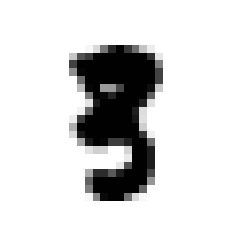

In [ ]:
i=l[610]
print(y_test[i])
plot_digit(X_test[i])
print(preds[i])
